## Handling outliers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

<Axes: >

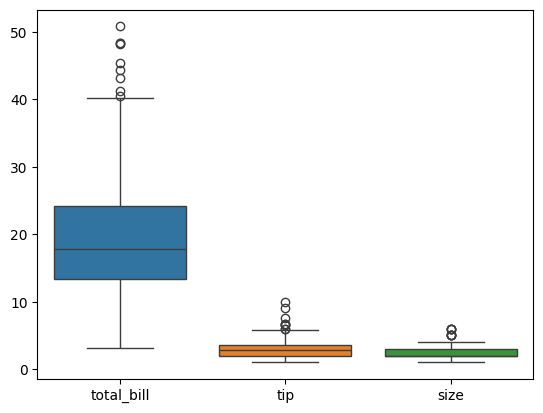

In [5]:
sns.boxplot(df)

In [6]:
q1,q3 = np.quantile(df['total_bill'],[0.25,0.75])

In [7]:
q1,q3

(13.3475, 24.127499999999998)

In [8]:
summary = df.describe()

In [9]:
summary

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
q1 = summary.loc['25%'][0]
q3 = summary.loc['75%'][0]

In [11]:
q1,q3

(13.3475, 24.127499999999998)

In [12]:
IQR = q3 - q1

In [13]:
IQR

10.779999999999998

In [14]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [15]:
lower_bound,upper_bound

(-2.8224999999999945, 40.29749999999999)

In [16]:
df = df[(df['total_bill'] >= lower_bound) & (df['total_bill'] <= upper_bound)]

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df.shape

(235, 7)

<Axes: >

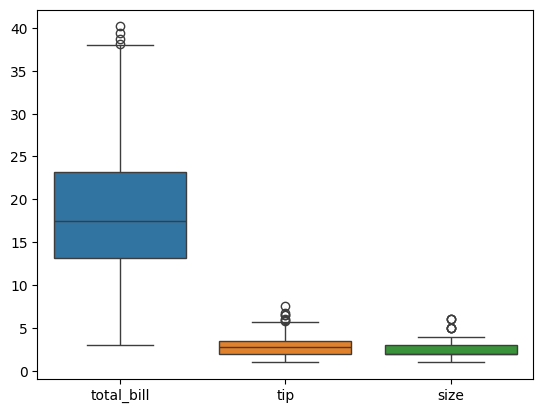

In [19]:
sns.boxplot(df)